<a href="https://colab.research.google.com/github/ramonVDAKKER/teaching-data-science-emas/blob/main/EMAS_intro_nn_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Setup

This demo will use Keras 3 with JAX (https://github.com/google/jax) as backend.

In [ ]:
!pip install keras==3.0.0 --upgrade --quiet

In [ ]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "jax"

# Keras should only be imported after jax has been configured.
import keras
import matplotlib.pyplot as plt

## 1. MNIST

Let's consider the `Hello World' of computervision: training a convnet to classify MNIST digits.

### 1.1 MNIST data

See https://en.wikipedia.org/wiki/MNIST_database for background on the MNIST dataset.

It is a large database of handwritten digits that is commonly used for training various image processing systems. It consists of greyscale images in a 28x28 pixel format.

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(f"{x_train.shape=}")
print(f"{y_train.shape=}")

The train set thus consists of 60,000 images. The data of an image is nothing but a 28x28 matrix representing the pixels of the image. The value of an entry of the matrix measures the greyscale. 0 means black, 255 means white. In between, every other number — 50, 87, 162, 209, and so on — is a shade of gray ranging from black to white.

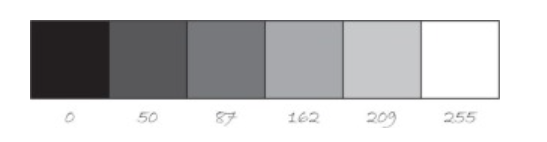

Let us inspect the data of the first image in the train set:


In [ ]:
print(x_train[0, :, :])

Next, let us inspect a few images and their labels.

In [ ]:
for j in range(0, 6):
    plt.imshow(x_train[j, :, :], cmap="gray")
    plt.show()
    print(f"The label is {y_train[j]}")

Next we scale the data as preprocessing step before we can turn to the modelling.

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Here's a basic ConvNet model.

If you want to learn more about the building blocks; see, for example, https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

In [ ]:
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

Here's our model summary:

In [ ]:
model.summary()

We use the `compile()` method to specify the optimizer, loss function,
and the metrics to monitor.

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

Let's train and evaluate the model. We'll set aside a validation split of 20%
of the data during training to monitor generalization on unseen data.

In [ ]:
batch_size = 128
epochs = 30

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks,
)
score = model.evaluate(x_test, y_test, verbose=0)

Please note:

In [ ]:
print(60_000 * (1 - 0.2))
print(128 * 375)

Next, you can query predictions of class probabilities with `predict()`:

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(predictions.shape)

In [ ]:
print(predictions[0, :])

The rows of the predictions array correspond to the predicted probability of each class. If we build a classifier by taking the class with the largest predicted probability we obtain:

In [ ]:
predicted_class = predictions.argmax(axis=1)
print(predicted_class.shape)

Some examples from the test set:

In [ ]:
for j in range(0, 6):
    plt.imshow(x_test[j, :, :], cmap="gray")
    plt.show()
    print(f"The true label is {y_test[j]}")
    print(f"The predicted label is {predicted_class[j]}")

Let us evaluate the performance on the test set:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Accuracy on test set: {accuracy_score(y_test, predicted_class)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted_class))
print("\nClassification Report:")
print(classification_report(y_test, predicted_class, target_names=[str(j) for j in range(0, 10)]))